Notebook to analyze where in the distortion space performance drops to chance levels.

In [1]:
import src.d04_analysis.distortion_performance_composite as dpc
import src.d00_utils.functions as functions
import src.d00_utils.definitions as definitions
from pathlib import Path
import numpy as np

wandb: Currently logged in as: austinbergstrom (use `wandb login --relogin` to force relogin)


In [2]:
class PseudoArgs(object):  # created because argparse does not seem to play nicely with Jupyter notebooks, and I need an argparse-like object for functions.get_config(args)

    def __init__(self, _config_dir, _config_filename):
        self.config_dir = _config_dir
        self.config_name = _config_filename

config_dir = str(Path(definitions.ROOT_DIR, 'image-quality-for-deep-learning', 'src', 'd04_analysis', 'composite_performance_configs'))
# config_filename = 'dn161_fr_mega1_mega2_composite.yml'
config_filename = 'pl_oct_composite_config.yml'

args_passed = PseudoArgs(config_dir, config_filename)

config = functions.get_config(args_passed)
cp, output_dir = dpc.get_composite_performance_result(config=config)

{
   "identifier": "oct-models-mega-1-mega-2",
   "performance_prediction_result_ids": [
      "0053-rlt-0023-resnet18-oct_111_best_loss-0006-tst-r_fr_pl-b_fr_pl-n_fr_pl_noise:v0",
      "0052-rlt-0023-resnet18-oct_110_best_loss-0006-tst-r_fr_pl-b_fr_pl-n_fr_pl_noise:v0",
      "0051-rlt-0023-resnet18-oct_101_best_loss-0006-tst-r_fr_pl-b_fr_pl-n_fr_pl_noise:v0",
      "0050-rlt-0023-resnet18-oct_100_best_loss-0006-tst-r_fr_pl-b_fr_pl-n_fr_pl_noise:v0",
      "0049-rlt-0023-resnet18-oct_011_best_loss-0006-tst-r_fr_pl-b_fr_pl-n_fr_pl_noise:v0",
      "0048-rlt-0023-resnet18-oct_010_best_loss-0006-tst-r_fr_pl-b_fr_pl-n_fr_pl_noise:v0",
      "0057-rlt-0031-resnet18-oct_001_best_loss-0006-tst-r_fr_pl-b_fr_pl-n_fr_pl_noise:v0",
      "0055-rlt-0031-resnet18-oct_000_best_loss-0006-tst-r_fr_pl-b_fr_pl-n_fr_pl_noise:v0"
   ],
   "performance_eval_result_ids": [
      "0045-rlt-0023-resnet18-oct_111_best_loss-0008-tst-full_range_mega_set_2_noise:v0",
      "0043-rlt-0023-resnet18-oct_110_best_l

In [3]:
def get_chance_performance_bins(_cp, threshold):
    res_values, blur_values, noise_values, perf_3d, distortion_array, perf_array, __ = _cp.get_3d_distortion_perf_props(distortion_ids=('res', 'blur', 'noise'), predict_eval_flag='eval')
    _chance_indices = np.where(perf_array <= threshold)[0]
    _chance_distortion_points = distortion_array[_chance_indices, :]
    return _chance_indices, _chance_distortion_points, perf_array, res_values, blur_values, noise_values

In [4]:
_threshold = 1.5 * (1 / 365)
chance_inds, chance_distortion_points, _perf_array, _res_vals, _blur_vals, _noise_vals = get_chance_performance_bins(cp, threshold=_threshold)

loading existing processed properties


In [5]:
print(chance_distortion_points)

[[ 0.09765625  1.325      32.        ]
 [ 0.09765625  1.57       42.        ]
 [ 0.09765625  1.57       48.        ]
 [ 0.09765625  1.57       50.        ]
 [ 0.09765625  1.815      28.        ]
 [ 0.09765625  2.305       2.        ]
 [ 0.09765625  2.305      36.        ]
 [ 0.09765625  2.55       18.        ]
 [ 0.09765625  2.55       36.        ]
 [ 0.09765625  2.795      44.        ]
 [ 0.09765625  3.04       38.        ]
 [ 0.09765625  3.04       40.        ]
 [ 0.09765625  3.04       44.        ]
 [ 0.09765625  3.285      18.        ]
 [ 0.09765625  3.285      26.        ]
 [ 0.09765625  3.285      28.        ]
 [ 0.09765625  3.53       22.        ]
 [ 0.09765625  3.53       30.        ]
 [ 0.09765625  3.53       44.        ]
 [ 0.09765625  3.775       4.        ]
 [ 0.09765625  3.775      10.        ]
 [ 0.09765625  3.775      12.        ]
 [ 0.09765625  3.775      20.        ]
 [ 0.09765625  3.775      26.        ]
 [ 0.09765625  3.775      34.        ]
 [ 0.09765625  3.775     

In [6]:
_perf_values = np.unique(_perf_array)

In [7]:
_perf_values[:10]

array([0.        , 0.01098901, 0.01111111, 0.01149425, 0.01176471,
       0.01190476, 0.01219512, 0.01234568, 0.01298701, 0.01315789],
      dtype=float32)

In [8]:
deltas = [_perf_values[i+1] - _perf_values[i] for i in range(len(_perf_values[:100]) - 1)]
num_dist_points = len(_perf_array)
dist_point_match = num_dist_points == len(_res_vals) * len(_blur_vals) * len(_noise_vals)
print('dist point match:', dist_point_match)
mean_samples = len(np.ravel(cp.top_1_vec)) / num_dist_points
single_image_delta = 1 / mean_samples
# print(deltas)

dist point match: True


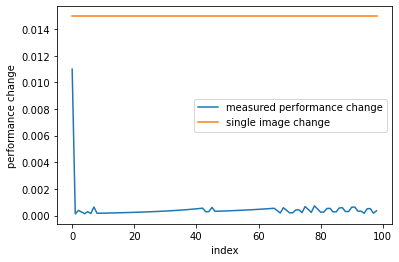

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(deltas, label='measured performance change')
plt.plot(single_image_delta * np.ones_like(deltas), label='single image change')
plt.xlabel('index')
plt.ylabel('performance change')
plt.legend()
plt.show()